# Veriye ilk bakis

In [1]:
import seaborn as sns
planets = sns.load_dataset("planets")
planets.head(6)

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009
5,Radial Velocity,1,185.840,4.80,76.39,2008


* Veri setinin  hikayesi **nedir?**

In [2]:
df = planets.copy()
df.head(6)

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009
5,Radial Velocity,1,185.840,4.80,76.39,2008


* Veri setinin yapisal bilgileri

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1035 entries, 0 to 1034
Data columns (total 6 columns):
method            1035 non-null object
number            1035 non-null int64
orbital_period    992 non-null float64
mass              513 non-null float64
distance          808 non-null float64
year              1035 non-null int64
dtypes: float64(3), int64(2), object(1)
memory usage: 48.6+ KB


In [4]:
df.dtypes
#degisken tipleri sorgulama

method             object
number              int64
orbital_period    float64
mass              float64
distance          float64
year                int64
dtype: object

In [5]:
import pandas as pd
df.method = pd.Categorical(df.method)
#method degiskeni onject tipinden categorik tipe donsuturuldu kolaylik icin

In [6]:
df.dtypes

method            category
number               int64
orbital_period     float64
mass               float64
distance           float64
year                 int64
dtype: object

### Veri setinin betimlenmesi

In [7]:
df.shape

(1035, 6)

In [8]:
df.columns

Index(['method', 'number', 'orbital_period', 'mass', 'distance', 'year'], dtype='object')

In [9]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
number,1035.0,1.785507,1.240976,1.000000,1.00000,1.0000,2.000,7.0
orbital_period,992.0,2002.917596,26014.728304,0.090706,5.44254,39.9795,526.005,730000.0
mass,513.0,2.638161,3.818617,0.003600,0.22900,1.2600,3.040,25.0
distance,808.0,264.069282,733.116493,1.350000,32.56000,55.2500,178.500,8500.0
year,1035.0,2009.070531,3.972567,1989.000000,2007.00000,2010.0000,2012.000,2014.0


* ! describe eksik gozlem ve kategorik degiskenleri goz ardi eder

In [10]:
df.describe(include = "all").T
#eksik gozlem ve cateegorik degiskenleri dahil etmek icin

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
method,1035,10,Radial Velocity,553,NaN,NaN,NaN,NaN,NaN,NaN,NaN
number,1035,NaN,NaN,NaN,1.78551,1.24098,1,1,1,2,7
orbital_period,992,NaN,NaN,NaN,2002.92,26014.7,0.0907063,5.44254,39.9795,526.005,730000
mass,513,NaN,NaN,NaN,2.63816,3.81862,0.0036,0.229,1.26,3.04,25
distance,808,NaN,NaN,NaN,264.069,733.116,1.35,32.56,55.25,178.5,8500
year,1035,NaN,NaN,NaN,2009.07,3.97257,1989,2007,2010,2012,2014


### Eksik degerlerin incelenmesi

In [11]:
import seaborn as sns
planets = sns.load_dataset("planets")
df = planets.copy()
df.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [12]:
df.isnull().values.any()
#eksik deger var mi sorgusu

True

In [13]:
df.isnull().sum()
#hangi degiskende eksik deger oldugunu bulma

method              0
number              0
orbital_period     43
mass              522
distance          227
year                0
dtype: int64

In [14]:
df["orbital_period"].fillna(0,inplace = True)
#orbital_period degiskenindeki null degerler 0 yapildi isleme sokulabilmesi icin
#inplace metodu bunu kalici hale getirdi

In [15]:
df.isnull().sum()
#artik orbital periodda null deger yok

method              0
number              0
orbital_period      0
mass              522
distance          227
year                0
dtype: int64

In [16]:
df["mass"].fillna(df.mass.mean(), inplace = True )
# mass degiskenindeki na degerler yerine toplam degerlerin ortalamasini yazar
# bu yontem verilerin guvenilirligi acisindan daha uygun bir yontemdir

In [17]:
df.isnull().sum()

method              0
number              0
orbital_period      0
mass                0
distance          227
year                0
dtype: int64

In [18]:
df.fillna(df.mean(), inplace = True)
# bu yontem ile dfdeki butun na deger yerine ortalama deger yazilir

In [19]:
df.isnull().sum()

method            0
number            0
orbital_period    0
mass              0
distance          0
year              0
dtype: int64

### Kategorik degisken ozetleri

In [20]:
import seaborn as sns
planets = sns.load_dataset("planets")
df = planets.copy()
df.head()


,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


* kategorik degiskenler farkli bir degerlendirmeye tabidir

In [21]:
kat_df = df.select_dtypes(include = ["object"])
kat_df.head(5)
#kategorik verileri cekme


,method
0,Radial Velocity
1,Radial Velocity
2,Radial Velocity
3,Radial Velocity
4,Radial Velocity


In [22]:
kat_df.method.unique()
#kategorik degiskenleri gosterir fakat sayıca cok olmasi sikinti

array(['Radial Velocity', 'Imaging', 'Eclipse Timing Variations',
       'Transit', 'Astrometry', 'Transit Timing Variations',
       'Orbital Brightness Modulation', 'Microlensing', 'Pulsar Timing',
       'Pulsation Timing Variations'], dtype=object)

In [23]:
kat_df["method"].value_counts().count()
#kategorik degiskenlerin kac sinifi oldugu gosterir
#yukaridaki ciktinin sayilmis halidir

10

In [24]:
kat_df["method"].value_counts()
#kategorik degisken siiniflarinin frekansi

Radial Velocity                  553
Transit                          397
Imaging                           38
Microlensing                      23
Eclipse Timing Variations          9
Pulsar Timing                      5
Transit Timing Variations          4
Orbital Brightness Modulation      3
Astrometry                         2
Pulsation Timing Variations        1
Name: method, dtype: int64

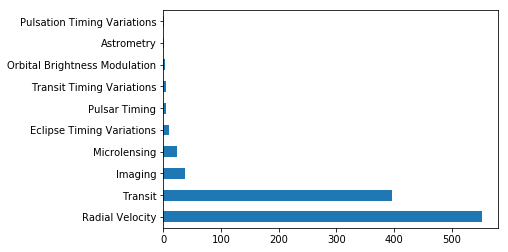

In [25]:
df["method"].value_counts().plot.barh();
# kategorik degisken sinif bilgisi gorsellestirildi

### Surekli degisken ozeti

In [26]:
import seaborn as sns
planets = sns.load_dataset("planets")
df = planets.copy()
df.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [27]:
df_num = df.select_dtypes(include = ["float", "int"])

In [28]:
df_num.head()

,orbital_period,mass,distance
0,269.300,7.10,77.40
1,874.774,2.21,56.95
2,763.000,2.60,19.84
3,326.030,19.40,110.62
4,516.220,10.50,119.47


In [29]:
df_num.describe().T

,count,mean,std,min,25%,50%,75%,max
orbital_period,992.0,2002.917596,26014.728304,0.090706,5.44254,39.9795,526.005,730000.0
mass,513.0,2.638161,3.818617,0.003600,0.22900,1.2600,3.040,25.0
distance,808.0,264.069282,733.116493,1.350000,32.56000,55.2500,178.500,8500.0


In [30]:
df_num["distance"].describe()
# belirli degiskenin betimsel degerlerine ulasma

count     808.000000
mean      264.069282
std       733.116493
min         1.350000
25%        32.560000
50%        55.250000
75%       178.500000
max      8500.000000
Name: distance, dtype: float64

In [31]:
print("ortalama : " + str(df_num["distance"].mean()))
print("dolu gozlem sayisi" + str(df_num["distance"].count()))
print("maksimum deger " + str(df_num["distance"].max()))
print("minumum deger " + str(df_num["distance"].min()))
print("medyan degeri " + str(df_num["distance"].median()))
print("standart sapma " + str(df_num["distance"].std()))

ortalama : 264.06928217821786
dolu gozlem sayisi808
maksimum deger 8500.0
minumum deger 1.35
medyan degeri 55.25
standart sapma 733.1164929404422


## Dagilim Grafikleri

 **Barplot**

* sutun grafikler elimizde **kategorik** verileri gorsellestirme icin kullanilir

In [32]:
import seaborn as sns
diamonds = sns.load_dataset("diamonds")
df = diamonds.copy()
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75



**Veri Seti Hikayesi**

price: dolar cinsinde fiyat ( 326– 18,823)

carat: ağırlık (0.2–5.01)

cut: kalite (Fair, Good, Very Good, Premium, Ideal)

color: renk (from J (worst) to D (best))

clarity: temizliği, berraklığı (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

x: length in mm (0–10.74)

y: width in mm (0–58.9)

z: depth in mm (0–31.8)

depth: toplam derinlik yüzdesi = z / mean(x, y) = 2 * z / (x + y) (43–79)

table: elmasın en geniş noktasına göre genişliği (43–95)



In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
carat      53940 non-null float64
cut        53940 non-null object
color      53940 non-null object
clarity    53940 non-null object
depth      53940 non-null float64
table      53940 non-null float64
price      53940 non-null int64
x          53940 non-null float64
y          53940 non-null float64
z          53940 non-null float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [34]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
carat,53940.0,0.797940,0.474011,0.2,0.40,0.70,1.04,5.01
depth,53940.0,61.749405,1.432621,43.0,61.00,61.80,62.50,79.00
table,53940.0,57.457184,2.234491,43.0,56.00,57.00,59.00,95.00
price,53940.0,3932.799722,3989.439738,326.0,950.00,2401.00,5324.25,18823.00
x,53940.0,5.731157,1.121761,0.0,4.71,5.70,6.54,10.74
y,53940.0,5.734526,1.142135,0.0,4.72,5.71,6.54,58.90
z,53940.0,3.538734,0.705699,0.0,2.91,3.53,4.04,31.80


In [35]:
df["cut"].value_counts()

Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64

In [36]:
df["color"].value_counts()

G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: color, dtype: int64

In [37]:
#kategorik deiskenler incelendi

In [38]:
#kategorik degiskenlerin siralama
#ordinal siralama
from pandas.api.types import CategoricalDtype

In [39]:
df.cut.head()

0      Ideal
1    Premium
2       Good
3    Premium
4       Good
Name: cut, dtype: object

In [40]:
df.cut = df.cut.astype(CategoricalDtype(ordered = True))


In [41]:
df.dtypes

carat       float64
cut        category
color        object
clarity      object
depth       float64
table       float64
price         int64
x           float64
y           float64
z           float64
dtype: object

In [42]:
df.cut.head(1)
#sirali kategorik degisken oldugunu gosteriyor

0    Ideal
Name: cut, dtype: category
Categories (5, object): [Fair < Good < Ideal < Premium < Very Good]

* sıralama sekli verinin kendisine uygun mu kesinlikle kontrol eilmeli

 bizim elimizdeki siralamayla programin atadigi siralama farkli bunu duzeltelim
 bizim istedigimiz  : [Fair < Good < Very Good < Premium < Ideal]
 
 programin yaptigi: [Fair < Good < Ideal < Premium < Very Good]
 

In [43]:
cut_kategoriler = ["Fair", "Good", "Very Good", "Premium", "Ideal"]

#yapilmasini istedigimiz siralamayi bir diziye tanimladik,parametre olarak yollayacaz



In [44]:
df.cut = df.cut.astype(CategoricalDtype(categories = cut_kategoriler, ordered = True))
#ustunluk siralamasinin nasil yapilmasini istersen ona uygun bir dizi tanimlayip parametre olarak yollarsin

In [45]:
df.cut.head()
#siralama yukaridaki islemle duzeltildi

0      Ideal
1    Premium
2       Good
3    Premium
4       Good
Name: cut, dtype: category
Categories (5, object): [Fair < Good < Very Good < Premium < Ideal]

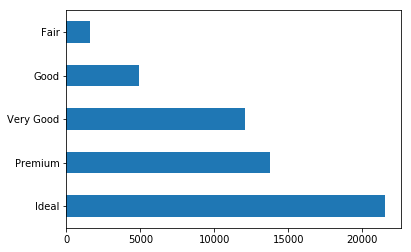

In [46]:
#barplot
df["cut"].value_counts().plot.barh()

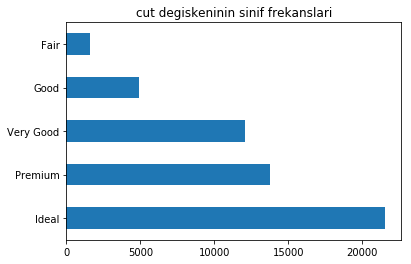

In [47]:
(df["cut"]
.value_counts()
.plot.barh()
.set_title("cut degiskeninin sinif frekanslari"));
#gorsel olarak daha guzel yazilir
#sondaki ; tablo infosunu kapatir

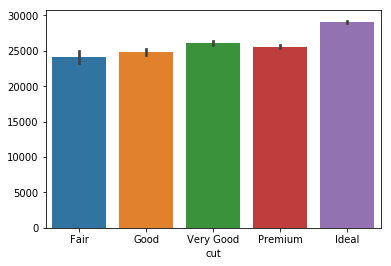

In [48]:
sns.barplot(x = "cut", y = df.cut.index,data = df);
#ayni grafigin seaborn kullanilarak olusturulmasi

## Carprazlamalar

In [49]:
import seaborn as sns
from pandas.api.types import CategoricalDtype
diamonds = sns.load_dataset('diamonds')
df = diamonds.copy()
cut_kategoriler = ["Fair","Good","Very Good","Premium","Ideal"]
df.cut = df.cut.astype(CategoricalDtype(categories = cut_kategoriler, ordered = True))
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


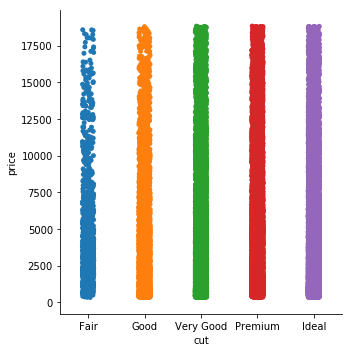

In [50]:
sns.catplot(x = "cut", y = "price", data = df); # cut ile price arasindaki iliski

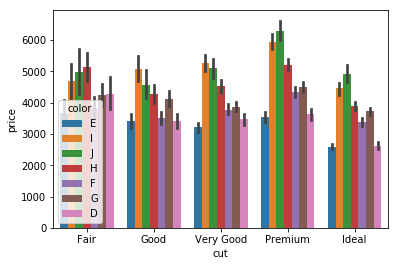

In [52]:
sns.barplot(x = "cut", y = "price", hue = "color", data = df) # daha derin inceleme

In [54]:
# soldaki price olceklendirmesi 3. boyut olan color girdigi icin degisti. saglikli bir gosterim icin.

In [57]:
df.groupby(["cut", "color"])["price"].mean()
# yukaridaki grafik check edilir...

cut        color
Fair       D        4291.061350
           E        3682.312500
           F        3827.003205
           G        4239.254777
           H        5135.683168
           I        4685.445714
           J        4975.655462
Good       D        3405.382175
           E        3423.644159
           F        3495.750275
           G        4123.482204
           H        4276.254986
           I        5078.532567
           J        4574.172638
Very Good  D        3470.467284
           E        3214.652083
           F        3778.820240
           G        3872.753806
           H        4535.390351
           I        5255.879568
           J        5103.513274
Premium    D        3631.292576
           E        3538.914420
           F        4324.890176
           G        4500.742134
           H        5216.706780
           I        5946.180672
           J        6294.591584
Ideal      D        2629.094566
           E        2597.550090
           F        337

## Histogram ve Yogunluk

In [60]:
import seaborn as sns
diamonds = sns.load_dataset("diamonds")
df = diamonds.copy()
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


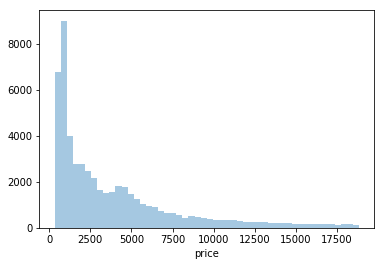

In [63]:
sns.distplot(df.price, kde = False)
#histogram grafigi
#ilk parametre hist edilmek istenen deger, ikinci ortalamanın tabloya eklenip eklenmeyecegi

In [67]:
?sns.distplot
#inceleme

Signature:
sns.distplot(
    a,
    bins=None,
    hist=True,
    kde=True,
    rug=False,
    fit=None,
    hist_kws=None,
    kde_kws=None,
    rug_kws=None,
    fit_kws=None,
    color=None,
    vertical=False,
    norm_hist=False,
    axlabel=None,
    label=None,
    ax=None,
)
Docstring:
Flexibly plot a univariate distribution of observations.

This function combines the matplotlib ``hist`` function (with automatic
calculation of a good default bin size) with the seaborn :func:`kdeplot`
and :func:`rugplot` functions. It can also fit ``scipy.stats``
distributions and plot the estimated PDF over the data.

Parameters
----------

a : Series, 1d-array, or list.
    Observed data. If this is a Series object with a ``name`` attribute,
    the name will be used to label the data axis.
bins : argument for matplotlib hist(), or None, optional
    Specification of hist bins, or None to use Freedman-Diaconis rule.
hist : bool, optional
    Whether to plot a (normed) histogram.
kde : bool, o

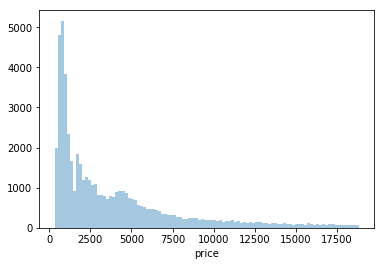

In [68]:
sns.distplot(df.price, bins = 100, kde = False)
#bins gosterilen kutu sayisidir grafigin hassasiyetini temsil eder

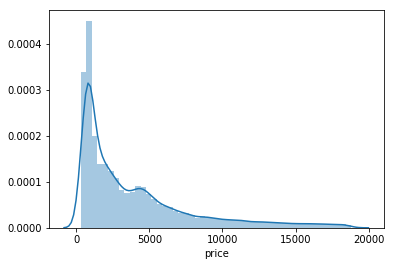

In [70]:
sns.distplot(df.price)
# olasilik yogunluk fonksiyonu

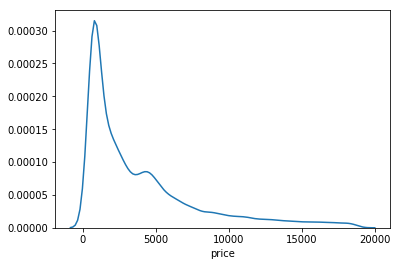

In [72]:
sns.distplot(df.price, hist = False)
# sadece yogunluk gosterimi

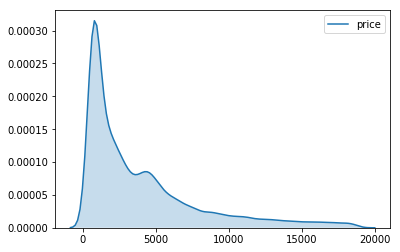

In [74]:
sns.kdeplot(df.price, shade = True)
# ayni yogunlulk grafiginin altini boyayarak verdi

## Histogram ve Carprazlama

In [75]:
import seaborn as sns
diamonds = sns.load_dataset('diamonds')
df = diamonds.copy()
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


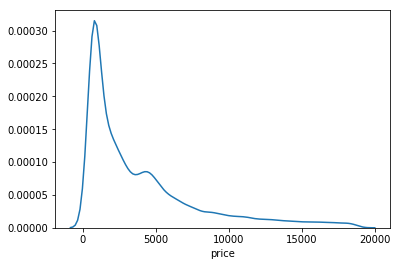

In [77]:
sns.distplot(df.price, hist = False)

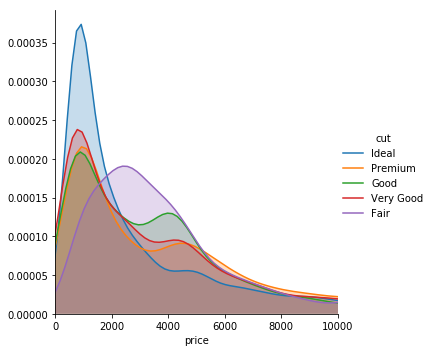

In [80]:
(sns
 .FacetGrid(df,
              hue = "cut",
              height = 5,
              xlim = (0, 10000))
 .map(sns.kdeplot, "price", shade= True)
 .add_legend()
);
# yogunluk fonksiyonuyla price degerinin cut histogramini carprazlama

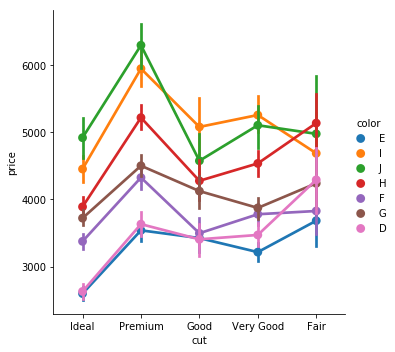

In [81]:
sns.catplot(x = "cut", y = "price", hue = "color", kind = "point", data = df);
# price degiskeni icinde cut categorik verilerin birbirlerine has bilgiler icerip icermedigine bakarız

## Boxplot

Veri setinin hikayesi

total_bill: yemeğin toplam fiyatı (bahşiş ve vergi dahil)

tip: bahşiş

sex: ücreti ödeyen kişinin cinsiyeti (0=male, 1=female)

smoker: grupta sigara içen var mı? (0=No, 1=Yes)

day: gün (3=Thur, 4=Fri, 5=Sat, 6=Sun)

time: ne zaman? (0=Day, 1=Night)

size: grupta kaç kişi var?

In [2]:
import seaborn as sns
tips = sns.load_dataset("tips")
df = tips.copy()
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2
7,26.88,3.12,Male,No,Sun,Dinner,4
8,15.04,1.96,Male,No,Sun,Dinner,2
9,14.78,3.23,Male,No,Sun,Dinner,2


In [2]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
total_bill,244.0,19.785943,8.902412,3.07,13.3475,17.795,24.1275,50.81
tip,244.0,2.998279,1.383638,1.00,2.0000,2.900,3.5625,10.00
size,244.0,2.569672,0.951100,1.00,2.0000,2.000,3.0000,6.00


total_bill: yemeğin toplam fiyatı (bahşiş ve vergi dahil)

tip: bahşiş

sex: ücreti ödeyen kişinin cinsiyeti (0=male, 1=female)

smoker: grupta sigara içen var mı? (0=No, 1=Yes)

day: gün (3=Thur, 4=Fri, 5=Sat, 6=Sun)

time: ne zaman? (0=Day, 1=Night)

size: grupta kaç kişi var?

In [3]:
import seaborn as sns
tips = sns.load_dataset("tips")
df = tips.copy()
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
total_bill,244.0,19.785943,8.902412,3.07,13.3475,17.795,24.1275,50.81
tip,244.0,2.998279,1.383638,1.00,2.0000,2.900,3.5625,10.00
size,244.0,2.569672,0.951100,1.00,2.0000,2.000,3.0000,6.00


In [5]:
df["sex"].value_counts()

Male      157
Female     87
Name: sex, dtype: int64

In [6]:
df["smoker"].value_counts()

No     151
Yes     93
Name: smoker, dtype: int64

In [11]:
df["tip"].value_counts().head()
# cok fazla veri oldugu icin genele baktik

2.0    33
3.0    23
4.0    12
5.0    10
2.5    10
Name: tip, dtype: int64

In [12]:
df["time"].value_counts()

Dinner    176
Lunch      68
Name: time, dtype: int64

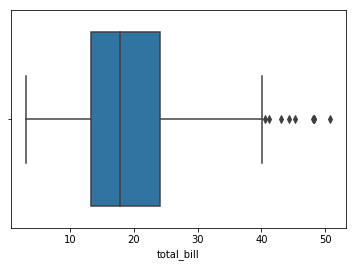

In [14]:
sns.boxplot(x = df["total_bill"])
# boxplot asagida sag taraftaki noktalari verinin kendi icinde degerlendirip...
# ...aykiri gozlem olarak tanimalamis

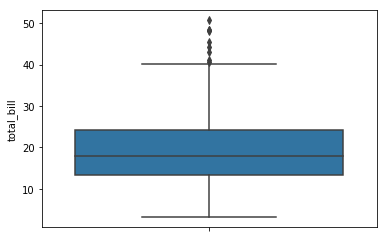

In [16]:
sns.boxplot(x = df["total_bill"], orient = "v")
# dikey formata getirildi

## Kutu Grafik Carprazlamalar

In [1]:
import seaborn as sns
tips = sns.load_dataset("tips")
df = tips.copy()
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [2]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
total_bill,244.0,19.785943,8.902412,3.07,13.3475,17.795,24.1275,50.81
tip,244.0,2.998279,1.383638,1.00,2.0000,2.900,3.5625,10.00
size,244.0,2.569672,0.951100,1.00,2.0000,2.000,3.0000,6.00


#### Hangi günler daha fazla para kazanilmis?

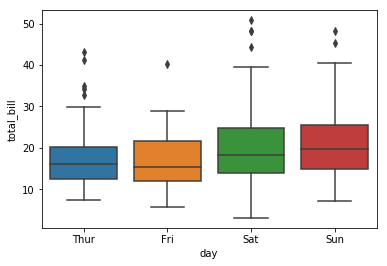

In [3]:
sns.boxplot(x = "day", y = "total_bill", data = df)

#### Sabah mi aksam mi daha cok para kazanilmis?

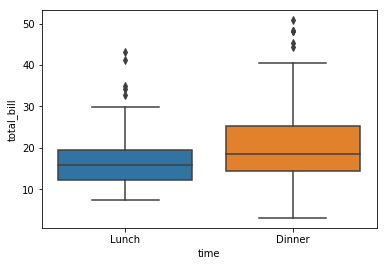

In [4]:
sns.boxplot(x = "time", y = "total_bill", data = df)

#### Kisi kazanc iliskisi

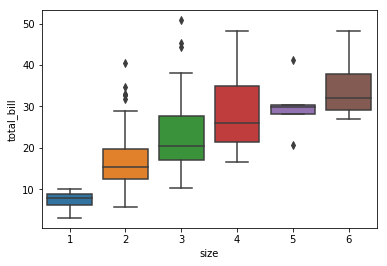

In [8]:
sns.boxplot(x = "size", y = "total_bill", data = df)

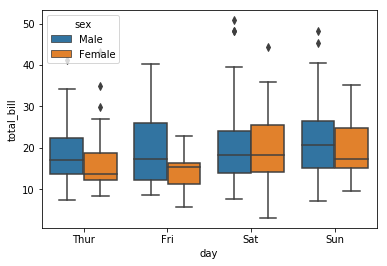

In [9]:
sns.boxplot(x = "day", y = "total_bill", hue = "sex", data = df)
# hue kendisine verilen parametreyi renklendirir

In [10]:
# medyan degerlere bakilinca(sekillerin ortasindaki cizgi) cmt haric erkekler daha fazla odemis

## Violin

In [11]:
import seaborn as sns
tips = sns.load_dataset("tips")
df = tips.copy()
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


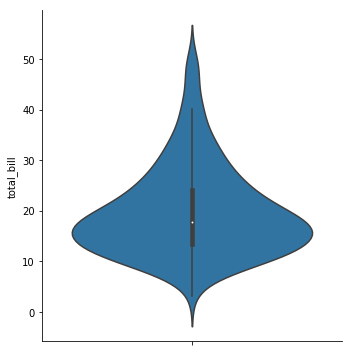

In [24]:
sns.catplot(y = "total_bill", kind = "violin", data = df )

## Korelasyon Grafikleri

### Scatterplot

* Scatterplot bize sayisal degiskenler arasindaki iliskiyi gosterir

In [2]:
import seaborn as sns
tips = sns.load_dataset("tips")
df = tips.copy()
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


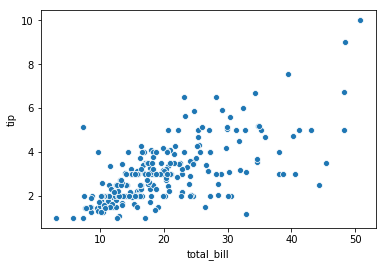

In [4]:
sns.scatterplot(x = "total_bill", y = "tip", data =df)
# bakildiginda odenen toplam hesap arttikca bahsisler de artmistir

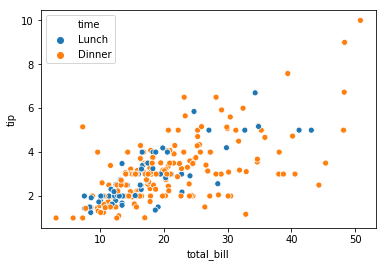

In [6]:
sns.scatterplot(x = "total_bill", y = "tip", hue="time", data = df )
# aksam yemeginde daha fazla bahsis verilmis

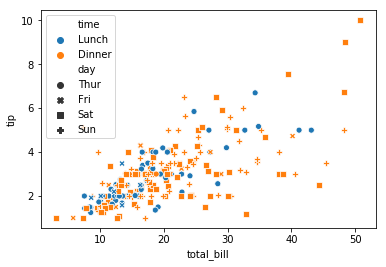

In [9]:
sns.scatterplot(x = "total_bill", y = "tip", hue="time", style = "day", data = df )
# yaptigimiz cikarimin gunler bazindaki kirilimina baktik

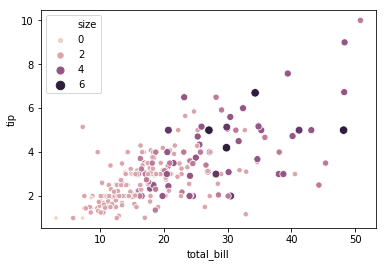

In [13]:
sns.scatterplot(x = "total_bill", y = "tip", hue = "size", size = "size", data = df )
# sayisal bir degisken eklendi kirilima

### Dogrusal iliskinin gosterilmesi

In [20]:
import seaborn as sns
tips = sns.load_dataset("tips")
df = tips.copy()

df.head()


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [21]:
import matplotlib.pyplot as plt

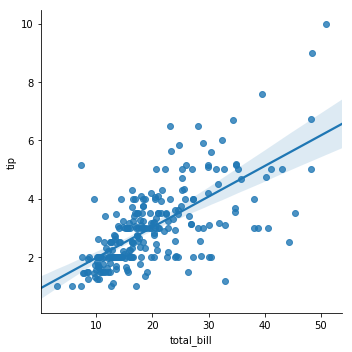

In [23]:
sns.lmplot(x = "total_bill", y = "tip", data = df)
# iki degisken arasindaki dogrusal iliski
# acik renkli alan sapmalari ifade eder

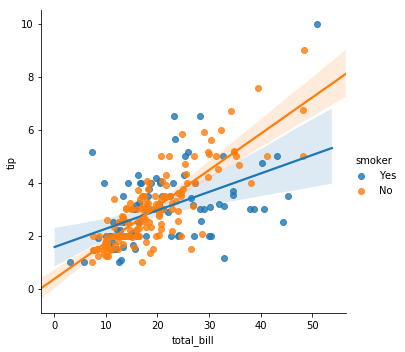

In [26]:
sns.lmplot(x = "total_bill", y = "tip", hue = "smoker", data = df)
# renkelndirmeyle sigara icme durumuna gore iki farkli dogru elde ettik
# sigara icmeyenlerin, hesap arttikca bahsis verme egilimi yuksektir

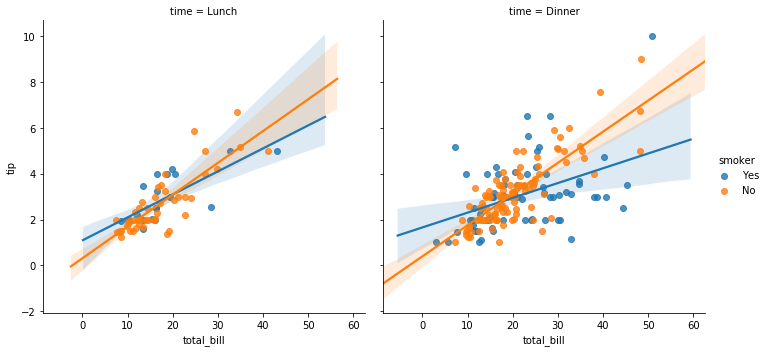

In [28]:
sns.lmplot(x = "total_bill", y = "tip", hue = "smoker", col = "time", data = df)
# col bir boyut daha ekler

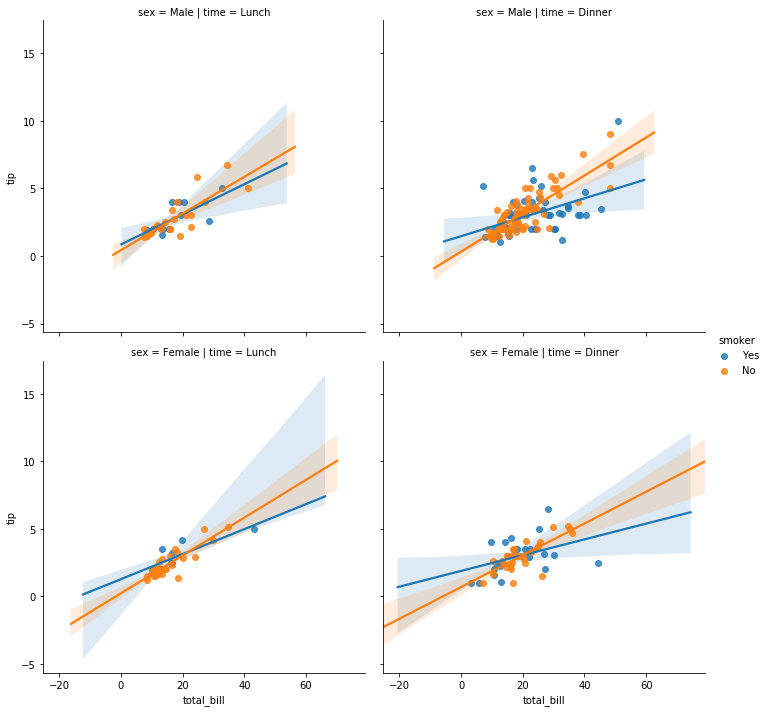

In [30]:
sns.lmplot(x = "total_bill", y = "tip", hue = "smoker", col = "time", row = "sex", data = df)
# row bir boyut daha ekler

## Scatterplot Matrisi

In [1]:
import seaborn as sns
iris = sns.load_dataset("iris")
df = iris.copy()
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
df.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

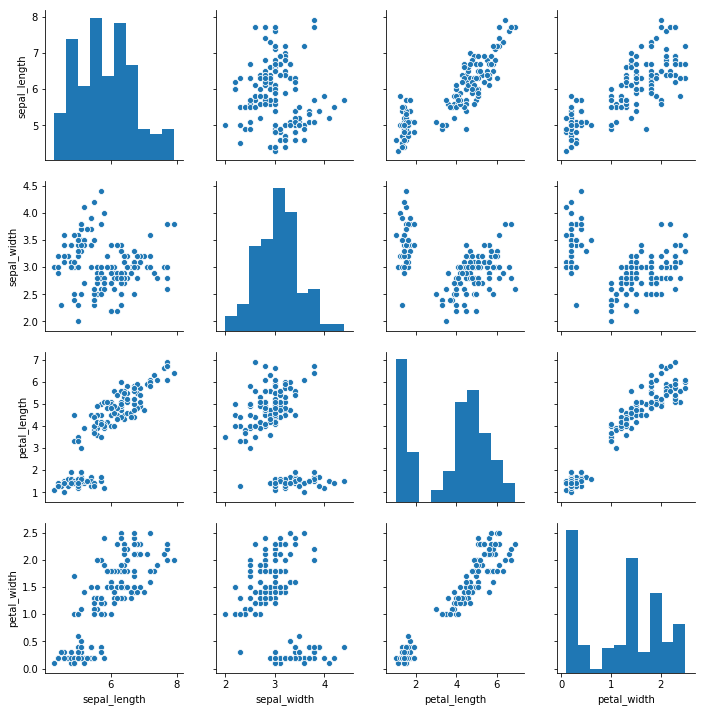

In [5]:
sns.pairplot(df)

##### Scatterplot görsellerinde olusan grafigin yapisal bir butunlugu yoksa aralarında iliski yok demektir.

##### Gozlem noktaları birbirinden farkli koselerde ise carprazlama yapilmali

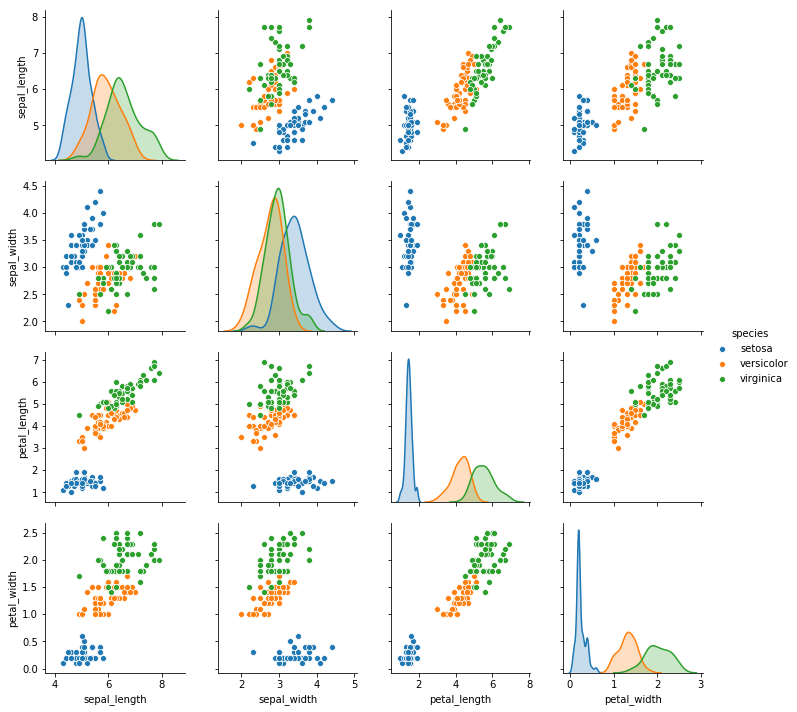

In [8]:
sns.pairplot(df, hue = "species")

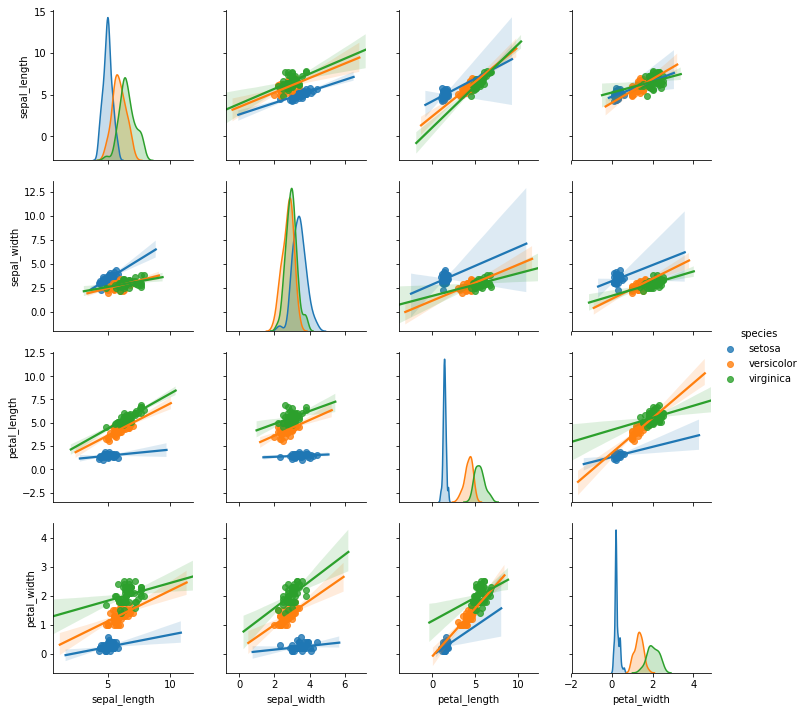

In [10]:
sns.pairplot(df, kind = "reg", hue ="species")
#grafiklere dogru eklendi

## Heatmap

In [1]:
import seaborn as sns
flights = sns.load_dataset("flights")
df = flights.copy()
df.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [2]:
sns.heatmap(df)
# bu kod hata verir cunku heatmap daha yapisal bir fonksiyonda istiyor dataframi

TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [3]:
df = df.pivot("month", "year" , "passengers");

# ilk parametre y , 2. parametre x, 3. parametre ise ksisim kabul edilir

In [4]:
df

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
January,112,115,145,171,196,204,242,284,315,340,360,417
February,118,126,150,180,196,188,233,277,301,318,342,391
March,132,141,178,193,236,235,267,317,356,362,406,419
April,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
June,135,149,178,218,243,264,315,374,422,435,472,535
July,148,170,199,230,264,302,364,413,465,491,548,622
August,148,170,199,242,272,293,347,405,467,505,559,606
September,136,158,184,209,237,259,312,355,404,404,463,508


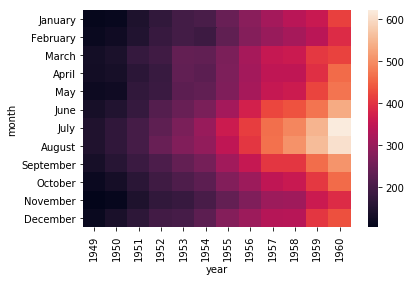

In [23]:
sns.heatmap(df)

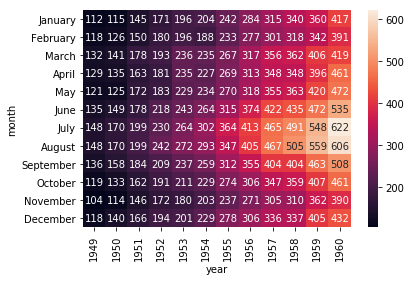

In [25]:
sns.heatmap(df, annot = True, fmt = "d")
# bu parametreler hucrelerin icine icerdikleri degeri yazar.

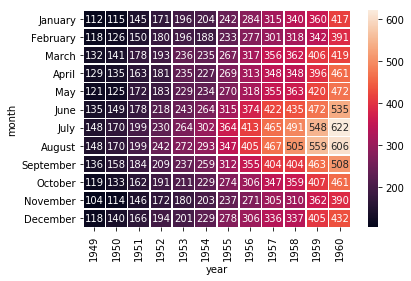

In [27]:
sns.heatmap(df, annot = True, fmt = "d", linewidths = .5)
# daha okunur halde sunar aralara bosluk koyarak

## Cizgi Grafik

In [29]:
import seaborn as sns
fmri = sns.load_dataset("fmri")
df = fmri.copy()
df.head()

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


In [31]:
df.groupby("timepoint")["signal"].count()
# her bir zaman araliginda esit sayida veri toplandigini bulduk

timepoint
0     56
1     56
2     56
3     56
4     56
5     56
6     56
7     56
8     56
9     56
10    56
11    56
12    56
13    56
14    56
15    56
16    56
17    56
18    56
Name: signal, dtype: int64

In [34]:
df.groupby("signal").count()
# sinayllerin tekil oldugunu gorduk

,subject,timepoint,event,region
signal,,,,
-0.255486,1,1,1,1
-0.238474,1,1,1,1
-0.224351,1,1,1,1
-0.181241,1,1,1,1
-0.178510,1,1,1,1
-0.176453,1,1,1,1
-0.169312,1,1,1,1
-0.160821,1,1,1,1
-0.159772,1,1,1,1


In [35]:
df.groupby("timepoint")["signal"].describe()

,count,mean,std,min,25%,50%,75%,max
timepoint,,,,,,,,
0,56.0,-0.016662,0.028326,-0.064454,-0.039169,-0.018382,0.003539,0.074399
1,56.0,-0.025002,0.030641,-0.082174,-0.046299,-0.024533,-0.005388,0.063558
2,56.0,-0.012873,0.035440,-0.110565,-0.034944,-0.013183,0.009318,0.077277
3,56.0,0.034446,0.058260,-0.089708,-0.001157,0.028430,0.061840,0.185581
4,56.0,0.098194,0.092838,-0.046347,0.030912,0.070166,0.144911,0.346775
5,56.0,0.137725,0.123353,-0.017946,0.042762,0.096535,0.211638,0.476055
6,56.0,0.127515,0.137332,-0.054405,0.022409,0.068850,0.218919,0.564985
7,56.0,0.075660,0.129704,-0.108222,-0.016252,0.032486,0.144781,0.494787
8,56.0,0.013420,0.104216,-0.181241,-0.049453,-0.012834,0.030396,0.337143


## Cizgi Grafik ve Carprazlamalar

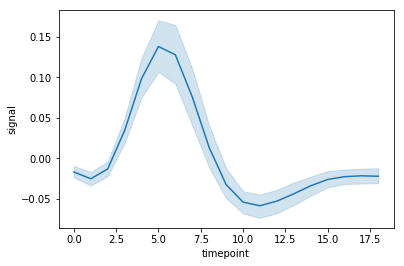

In [37]:
sns.lineplot(x = "timepoint", y = "signal", data =df)

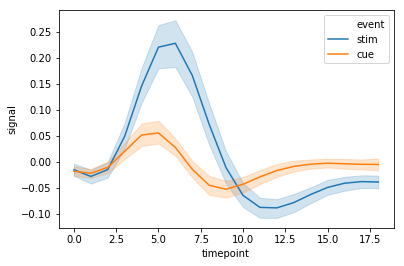

In [38]:
sns.lineplot(x = "timepoint", y = "signal", hue = "event", data =df)

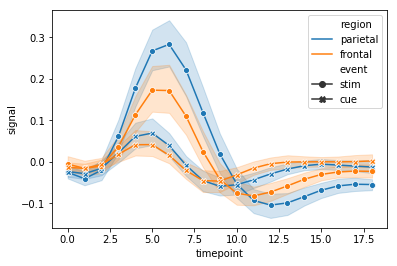

In [44]:
sns.lineplot(x = "timepoint", 
             y = "signal", 
             hue = "region", 
             style = "event", 
             markers = True,
             dashes = False,
             data = df)

## Basit Zaman Serisi Graifigi

In [46]:
!pip install pandas_datareader
import pandas_datareader as pr

In [48]:
df = pr.get_data_yahoo("AAPL", start = "2016-01-01", end = "2019-08-25")
# Bir borsa sitesinden Apple verilerini(AAPL) belli tarihler arasi icin cektik

In [50]:
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-01-04,26.342501,25.500000,25.652500,26.337500,270597600.0,24.202784
2016-01-05,26.462500,25.602501,26.437500,25.677500,223164000.0,23.596279
2016-01-06,25.592501,24.967501,25.139999,25.174999,273829600.0,23.134508
2016-01-07,25.032499,24.107500,24.670000,24.112499,324377600.0,22.158121
2016-01-08,24.777500,24.190001,24.637501,24.240000,283192000.0,22.275295


In [53]:
kapanis = df["Close"]
kapanis.head()

Date
2016-01-04    26.337500
2016-01-05    25.677500
2016-01-06    25.174999
2016-01-07    24.112499
2016-01-08    24.240000
Name: Close, dtype: float64

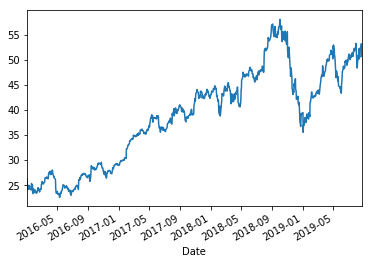

In [54]:
kapanis.plot()